In [421]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [422]:
df=pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [423]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [424]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [425]:
df=df.drop('_c39',axis=1)

In [426]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Data Preprocessing

#### Cleaning Data

In [427]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [428]:
#Making a Duplicate Dataframe for data cleaning.
df1=df.copy()

In [429]:
df1.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [430]:
#Separating N and D in N/D formats of policy_csl
df1['csl_person'] = df.policy_csl.str.split('/',expand=True)[0]
df1['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]
df1.drop('policy_csl',axis=1,inplace=True)

In [431]:
df1['csl_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_person, dtype: object

In [432]:
#df1['incident_period_of_day']
df1['incident_date']


0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
          ...    
995    2015-02-22
996    2015-01-24
997    2015-01-23
998    2015-02-26
999    2015-02-26
Name: incident_date, Length: 1000, dtype: object

In [433]:
#df1[["day", "month", "year"]] = df1["date"].str.split("-", expand = True) #expand=True for getting Dataframe instead of Dataseries.
df1['Acc_year']=df.incident_date.str.split('-',expand=True)[0]
df1['Acc_month']=df.incident_date.str.split('-',expand=True)[1]
df1['Acc_Day']=df.incident_date.str.split('-',expand=True)[2]
df1.drop('incident_date',axis=1,inplace=True)

In [434]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [435]:
#Now looking on Incident Hour and converting it into categorical variable like 6 to 9 in early morning.
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  #Factorize according to the time period of the day.
#Take -1 instead of 0 else NaN would be encounter.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df1['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype('object')
df1[['incident_hour_of_the_day', 'incident_period_of_day']].head(10)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [436]:
df1.drop('incident_hour_of_the_day',axis=1,inplace=True)

In [437]:
#Now last feature left to be converted is auto_year. We can bring down the values of year by replacing it with their age.
df1['vehicle_age'] = 2021 - df1['auto_year'] 
df1['vehicle_age'].head(10)
df1.drop('auto_year',axis=1,inplace=True)


In [438]:
#Checking Categorical Variable
df1.select_dtypes(object).columns

Index(['policy_bind_date', 'policy_state', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       'csl_person', 'csl_per_accident', 'Acc_year', 'Acc_month', 'Acc_Day',
       'incident_period_of_day'],
      dtype='object')

In [439]:
#Dropping rest not required Features.
df1 = df1.drop(columns =['policy_number','insured_zip','policy_bind_date','incident_location'])

In [440]:
#Identifying ? in all features for confirmation as we saw it in 'police_report_available' feature.
detector={}
for i in df.columns:
    if(df[i].dtype=='object'):
        j=np.sum(df[i]=='?')
        detector[i]=j
detector= pd.DataFrame.from_dict(detector,orient='index')
print(detector) 

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [441]:
#df1['collision_type'].value_counts()

In [442]:
df1= pd.get_dummies(df1,columns=['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies', 'insured_relationship','incident_type','incident_severity','incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model','csl_person','csl_per_accident','incident_period_of_day'])
                             

In [443]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,collision_type,number_of_vehicles_involved,property_damage,...,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,328,48,1000,1406.91,0,53300,0,Side Collision,1,YES,...,0,0,1,0,1,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,?,1,?,...,0,0,1,0,0,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,Rear Collision,3,NO,...,0,1,0,0,0,0,0,1,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,Front Collision,1,?,...,0,0,1,0,1,0,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,?,1,NO,...,1,0,0,0,0,1,0,0,0,0


In [444]:
df1.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'collision_type', 'number_of_vehicles_involved',
       'property_damage',
       ...
       'csl_per_accident_1000', 'csl_per_accident_300', 'csl_per_accident_500',
       'incident_period_of_day_afternoon',
       'incident_period_of_day_early_morning',
       'incident_period_of_day_evening', 'incident_period_of_day_fore-noon',
       'incident_period_of_day_morning', 'incident_period_of_day_night',
       'incident_period_of_day_past_midnight'],
      dtype='object', length=171)

In [445]:
df1['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [446]:
#Label Encoding of Target and collision_type.
Label_Enc= LabelEncoder()
df1['collision_type']=Label_Enc.fit_transform(df1['collision_type'])
df1['fraud_reported']=Label_Enc.fit_transform(df1['fraud_reported'])

In [447]:
df1['collision_type'].head(10)

0    3
1    0
2    2
3    1
4    0
5    2
6    1
7    1
8    1
9    2
Name: collision_type, dtype: int32

<AxesSubplot:xlabel='property_damage', ylabel='count'>

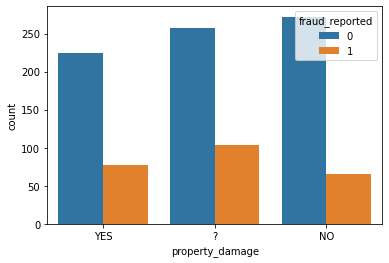

In [448]:
df1['property_damage'].value_counts()
sns.countplot(df1['property_damage'],hue=df1['fraud_reported'])
#Considering ? same as No

In [449]:
#Filling ? and No with 0 police_report_available and property_damage
#for i in range(0,1000):
#    if (df1['property_damage'][i]=='?' or df1['property_damage'][i]=='No'):
#        df1['property_damage'][i]=0
#    else:
#        df1['property_damage'][i]=1
#    i+=1

In [450]:
#df1['property_damage'].replace(to_replace='?',value=0,inplace=True)
#df1['property_damage'].replace(to_replace='NO',value=0,inplace=True)
#df1['property_damage'].replace(to_replace='YES',value=1,inplace=True)
#df1['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
#df1['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
#df1['police_report_available'].replace(to_replace='?', value=0, inplace=True)
df1['property_damage']= Label_Enc.fit_transform(df1['property_damage'])
df1['police_report_available']=Label_Enc.fit_transform(df1['police_report_available'])

In [451]:
df1['property_damage']

0      2
1      0
2      1
3      0
4      1
      ..
995    2
996    2
997    0
998    0
999    0
Name: property_damage, Length: 1000, dtype: int32

### Scaling the features and detecting the outlier


In [452]:
#df.columns
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 171 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    months_as_customer                      int64  
 1    age                                     int64  
 2    policy_deductable                       int64  
 3    policy_annual_premium                   float64
 4    umbrella_limit                          int64  
 5    capital-gains                           int64  
 6    capital-loss                            int64  
 7    collision_type                          int32  
 8    number_of_vehicles_involved             int64  
 9    property_damage                         int32  
 10   bodily_injuries                         int64  
 11   witnesses                               int64  
 12   police_report_available                 int32  
 13   total_claim_amount                      int64  
 14   injury_claim           

In [453]:
#Duplicate features were encounterd in XGBoost 
df1 = df1.loc[:,~df1.columns.duplicated()]

In [454]:
X= df1.drop('fraud_reported',axis=1)
y= df1['fraud_reported']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

SS=StandardScaler()
X_scaled_train=SS.fit_transform(X_train)
X_scaled_test= SS.transform(X_test)
X_scaled_train= pd.DataFrame(X_scaled_train,columns= X_train.columns)
X_scaled_test= pd.DataFrame(X_scaled_test,columns= X_test.columns)
y_train=pd.DataFrame(y_train)

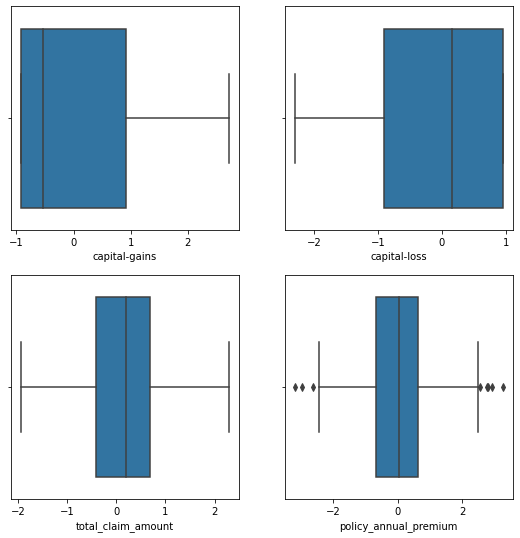

In [455]:
#Checking Outlier
#X_scaled=
columns={'policy_annual_premium','capital-gains','capital-loss','total_claim_amount'}
plt.figure(figsize=(9,14))
i=1
for c in columns:
    plt.subplot(3,2,i)
    i+=1
    sns.boxplot(X_scaled_train[c])

326.0875000000001


<AxesSubplot:xlabel='policy_annual_premium'>

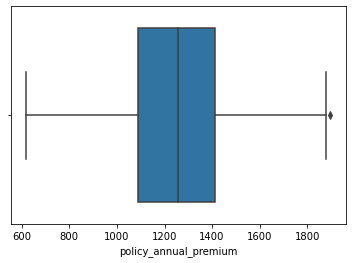

In [456]:
q1,q3=np.percentile(X['policy_annual_premium'],[25,75])
iqr=q3-q1
print(iqr)
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5* iqr)
df1= df1[df1['policy_annual_premium']>lower_fence]
df1= df1[df1['policy_annual_premium']<higher_fence]
sns.boxplot(df1['policy_annual_premium'])

## Trying out different Models

In [457]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

seed=np.random.seed()

adb = AdaBoostClassifier()
xgb = XGBClassifier()
logreg= LogisticRegressionCV()
dt = DecisionTreeClassifier(max_depth=5)
lda = LinearDiscriminantAnalysis()
QDA=QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
knn = KNeighborsClassifier(5)
svcl = SVC()
rf=RandomForestClassifier()

In [458]:
xgb = XGBClassifier(objective='binary:logistic',n_estimators=250,learning_rate = 0.01,random_state=seed)

In [459]:
#gmma k dekh notes se
eval_set = [(X_scaled_train, y_train), (X_scaled_test, y_test)]
xgb.fit(X_scaled_train, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
#n_estimator=230 is ideal value validation_0-logloss:0.18841, validation_1-logloss: 0.41639
#n_estimator=230 with alpha=0.1 is making model overfit the training data

[0]	validation_0-error:0.09714	validation_0-logloss:0.68647	validation_1-error:0.16667	validation_1-logloss:0.68731
[1]	validation_0-error:0.08857	validation_0-logloss:0.68003	validation_1-error:0.17000	validation_1-logloss:0.68178
[2]	validation_0-error:0.09286	validation_0-logloss:0.67371	validation_1-error:0.17000	validation_1-logloss:0.67637
[3]	validation_0-error:0.09857	validation_0-logloss:0.66750	validation_1-error:0.18000	validation_1-logloss:0.67115
[4]	validation_0-error:0.09857	validation_0-logloss:0.66140	validation_1-error:0.18000	validation_1-logloss:0.66606
[5]	validation_0-error:0.09857	validation_0-logloss:0.65542	validation_1-error:0.18667	validation_1-logloss:0.66096
[6]	validation_0-error:0.10143	validation_0-logloss:0.64954	validation_1-error:0.19000	validation_1-logloss:0.65597
[7]	validation_0-error:0.09714	validation_0-logloss:0.64376	validation_1-error:0.19000	validation_1-logloss:0.65099
[8]	validation_0-error:0.09429	validation_0-logloss:0.63809	validation_1

[71]	validation_0-error:0.07143	validation_0-logloss:0.41146	validation_1-error:0.16333	validation_1-logloss:0.45939
[72]	validation_0-error:0.07143	validation_0-logloss:0.40910	validation_1-error:0.16333	validation_1-logloss:0.45765
[73]	validation_0-error:0.07286	validation_0-logloss:0.40684	validation_1-error:0.16333	validation_1-logloss:0.45609
[74]	validation_0-error:0.07000	validation_0-logloss:0.40465	validation_1-error:0.16333	validation_1-logloss:0.45444
[75]	validation_0-error:0.07143	validation_0-logloss:0.40227	validation_1-error:0.15667	validation_1-logloss:0.45279
[76]	validation_0-error:0.07286	validation_0-logloss:0.40014	validation_1-error:0.15667	validation_1-logloss:0.45124
[77]	validation_0-error:0.07286	validation_0-logloss:0.39778	validation_1-error:0.16333	validation_1-logloss:0.44954
[78]	validation_0-error:0.07143	validation_0-logloss:0.39566	validation_1-error:0.16000	validation_1-logloss:0.44810
[79]	validation_0-error:0.07143	validation_0-logloss:0.39343	val

[141]	validation_0-error:0.06000	validation_0-logloss:0.29943	validation_1-error:0.16667	validation_1-logloss:0.38551
[142]	validation_0-error:0.06000	validation_0-logloss:0.29829	validation_1-error:0.16667	validation_1-logloss:0.38512
[143]	validation_0-error:0.05857	validation_0-logloss:0.29717	validation_1-error:0.16667	validation_1-logloss:0.38449
[144]	validation_0-error:0.05857	validation_0-logloss:0.29596	validation_1-error:0.16667	validation_1-logloss:0.38379
[145]	validation_0-error:0.05857	validation_0-logloss:0.29496	validation_1-error:0.16667	validation_1-logloss:0.38318
[146]	validation_0-error:0.05857	validation_0-logloss:0.29387	validation_1-error:0.16667	validation_1-logloss:0.38248
[147]	validation_0-error:0.06000	validation_0-logloss:0.29276	validation_1-error:0.16667	validation_1-logloss:0.38192
[148]	validation_0-error:0.06000	validation_0-logloss:0.29160	validation_1-error:0.16667	validation_1-logloss:0.38127
[149]	validation_0-error:0.06000	validation_0-logloss:0.

[211]	validation_0-error:0.05286	validation_0-logloss:0.23712	validation_1-error:0.17333	validation_1-logloss:0.35981
[212]	validation_0-error:0.05286	validation_0-logloss:0.23651	validation_1-error:0.17333	validation_1-logloss:0.35963
[213]	validation_0-error:0.05286	validation_0-logloss:0.23584	validation_1-error:0.17333	validation_1-logloss:0.35941
[214]	validation_0-error:0.05286	validation_0-logloss:0.23522	validation_1-error:0.17333	validation_1-logloss:0.35916
[215]	validation_0-error:0.05286	validation_0-logloss:0.23464	validation_1-error:0.17333	validation_1-logloss:0.35897
[216]	validation_0-error:0.05286	validation_0-logloss:0.23395	validation_1-error:0.17333	validation_1-logloss:0.35878
[217]	validation_0-error:0.05286	validation_0-logloss:0.23337	validation_1-error:0.17000	validation_1-logloss:0.35859
[218]	validation_0-error:0.05286	validation_0-logloss:0.23278	validation_1-error:0.17000	validation_1-logloss:0.35829
[219]	validation_0-error:0.05286	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

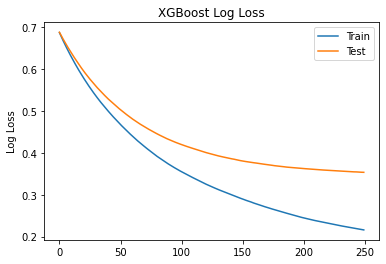

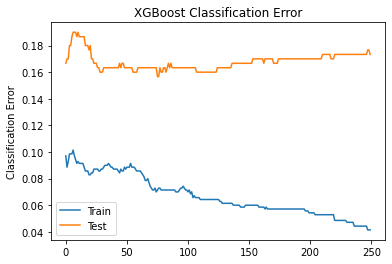

In [460]:
import matplotlib.pyplot as plt
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [461]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel


y_pred = xgb.predict(X_scaled_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
selection_model = XGBClassifier(random_state=seed)
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_scaled_train)
    
    # train model
    selection_model = XGBClassifier(random_state=seed)
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_scaled_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    
    #Thresh=0.006, n=63, Accuracy: 85.57%

Accuracy: 82.67%
[23:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to res

Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric

Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric

Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=166, Accuracy: 80.67%
[23:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric

Thresh=0.004, n=69, Accuracy: 81.00%
[23:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=68, Accuracy: 80.33%
[23:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=67, Accuracy: 80.00%
[23:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if

Thresh=0.009, n=45, Accuracy: 81.67%
[23:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.009, n=44, Accuracy: 82.67%
[23:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.009, n=43, Accuracy: 82.67%
[23:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if

Thresh=0.011, n=21, Accuracy: 82.33%
[23:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.012, n=20, Accuracy: 82.00%
[23:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.012, n=19, Accuracy: 81.00%
[23:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if

In [462]:


models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', cv=10,random_state=seed)))
models.append(('XGB', xgb))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(criterion='gini',random_state=seed)))
models.append(('SVM', SVC(gamma='auto',random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200,random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))

In [463]:
results=[]
name=[]
scoring='accuracy'
for mod_name,model in models:
    kfold= KFold(n_splits=7,shuffle=True,random_state=seed)
    cv_results=cross_val_score(model,X_scaled_train,y_train,cv=kfold,scoring=scoring,error_score="raise") 
    results.append(cv_results)
    names.append(mod_name)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean()*100, cv_results.std() * 2))

Accuracy: 80.86 (+/- 0.09)
[23:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:08] WARNING: C:/Users/Administrator/

## #Taking highest 4 Models for Voting Classifier Implementation
i.e LDA, XGB, LR, DT

## Voting Classifier

In [464]:
seed=np.random.seed()
estimator = []
estimator.append(('LDA', LinearDiscriminantAnalysis()))
estimator.append(('LR',LogisticRegressionCV(solver ='lbfgs',random_state=seed)))
estimator.append(('XGB', XGBClassifier(solver = 'lbfgs',random_state=seed)))
estimator.append(('DTC', DecisionTreeClassifier(criterion='gini',random_state=seed)))


In [465]:
#Object datatype is not consumable by voting classifier
convert_dict = {'Acc_year': int,'Acc_month': int,'Acc_Day':int }
X_train1 = X_train.astype(convert_dict)
X_test1 = X_test.astype(convert_dict)

In [470]:
#hard voting didnt performed better.
soft_voting = VotingClassifier(estimators = estimator, voting ='soft')
soft_voting.fit(X_train1,y_train)
y_pred= soft_voting.predict(X_test1)

from sklearn.metrics import accuracy_score
print("Accuracy of Soft voting classifier is {0}%".format(accuracy_score(y_pred,y_test)*100))

[23:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Soft voting classifier is 81.66666666666667%


In [467]:
#Accuracy didnt increased much let's optimise 